## Project 2 - 
Practice using built in sqlite and a database named Chinook.
The sample dataset pulled from SQLITE Tutorial https://www.sqlitetutorial.net/sqlite-sample-database/

Below is the diagram of the database used.

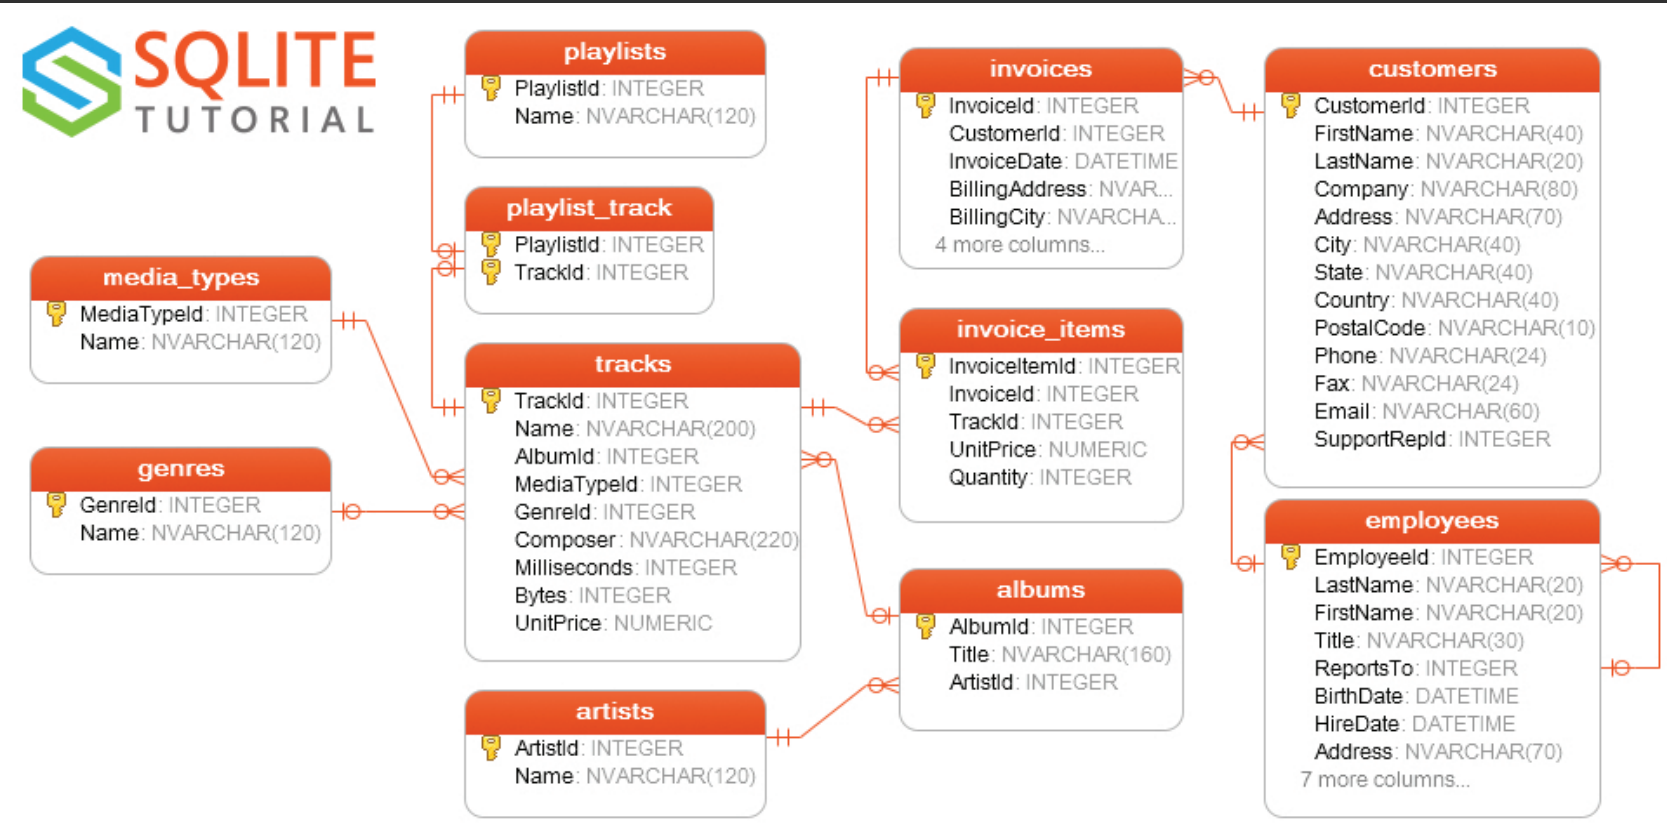

Please note: I removed the true url connection from the final data.

In [1]:
import sqlite3
from sqlite3 import Error

import pandas as pd

conn = sqlite3.connect('chinook.db')


Display the names of all of the tables in the Chinook database

In [2]:
sql_query = '''
        SELECT name
        FROM sqlite_schema
        WHERE type = "table";
        '''
cursor = conn.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())
cursor.close()

[('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',)]


Returns all table information from the database

In [3]:
sql_query = '''
        SELECT *
        FROM sqlite_schema
        WHERE type = "table";
        '''
cursor = conn.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())
cursor.close()

[('table', 'albums', 'albums', 2, 'CREATE TABLE "albums"\r\n(\r\n    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [Title] NVARCHAR(160)  NOT NULL,\r\n    [ArtistId] INTEGER  NOT NULL,\r\n    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)'), ('table', 'sqlite_sequence', 'sqlite_sequence', 3, 'CREATE TABLE sqlite_sequence(name,seq)'), ('table', 'artists', 'artists', 4, 'CREATE TABLE "artists"\r\n(\r\n    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [Name] NVARCHAR(120)\r\n)'), ('table', 'customers', 'customers', 5, 'CREATE TABLE "customers"\r\n(\r\n    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    [FirstName] NVARCHAR(40)  NOT NULL,\r\n    [LastName] NVARCHAR(20)  NOT NULL,\r\n    [Company] NVARCHAR(80),\r\n    [Address] NVARCHAR(70),\r\n    [City] NVARCHAR(40),\r\n    [State] NVARCHAR(40),\r\n    [Country] NVARCHAR(40),\r\n    [PostalCode] NVARCHAR(10),\r\n    [Phone] NVAR

Return the genres in the genres table. Limit the information retuned to 25

In [4]:
sql_query = '''
        SELECT *
        FROM genres
        LIMIT 25;
        '''
cursor = conn.cursor()
res = cursor.execute(sql_query)
for row in res:
    print(row)
cursor.close()

(1, 'Rock')
(2, 'Jazz')
(3, 'Metal')
(4, 'Alternative & Punk')
(5, 'Rock And Roll')
(6, 'Blues')
(7, 'Latin')
(8, 'Reggae')
(9, 'Pop')
(10, 'Soundtrack')
(11, 'Bossa Nova')
(12, 'Easy Listening')
(13, 'Heavy Metal')
(14, 'R&B/Soul')
(15, 'Electronica/Dance')
(16, 'World')
(17, 'Hip Hop/Rap')
(18, 'Science Fiction')
(19, 'TV Shows')
(20, 'Sci Fi & Fantasy')
(21, 'Drama')
(22, 'Comedy')
(23, 'Alternative')
(24, 'Classical')
(25, 'Opera')


In [5]:
#function to help select tables
def select(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        result = cursor.execute(query)
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [6]:
# Looking at the diagram, it is difficult to see all the elements contained in 
#TABLE invoices and TABLE employees.  So let's look at those columns

S_invoices = '''
        SELECT *
        FROM invoices;
        '''
invoice_data = select(conn, S_invoices)
for col in invoice_data.description:
    print(col[0])



InvoiceId
CustomerId
InvoiceDate
BillingAddress
BillingCity
BillingState
BillingCountry
BillingPostalCode
Total


In [7]:
S_empl = '''
        SELECT *
        FROM employees;
        '''
ee_data = select(conn, S_empl)
for col in ee_data.description:
    print(col[0])

EmployeeId
LastName
FirstName
Title
ReportsTo
BirthDate
HireDate
Address
City
State
Country
PostalCode
Phone
Fax
Email


In [8]:
select(conn, "SELECT Title, artistID FROM albums LIMIT 10;").fetchall()

[('For Those About To Rock We Salute You', 1),
 ('Balls to the Wall', 2),
 ('Restless and Wild', 2),
 ('Let There Be Rock', 1),
 ('Big Ones', 3),
 ('Jagged Little Pill', 4),
 ('Facelift', 5),
 ('Warner 25 Anos', 6),
 ('Plays Metallica By Four Cellos', 7),
 ('Audioslave', 8)]

In [9]:
select(conn, "SELECT * FROM albums WHERE artistID = 8 LIMIT 10;").fetchall()

[(10, 'Audioslave', 8), (11, 'Out Of Exile', 8), (271, 'Revelations', 8)]

In [10]:
pd.read_sql("SELECT Name, artistID FROM artists LIMIT 10;", conn)

,Name,ArtistId
0,AC/DC,1
1,Accept,2
2,Aerosmith,3
3,Alanis Morissette,4
4,Alice In Chains,5
5,Antônio Carlos Jobim,6
6,Apocalyptica,7
7,Audioslave,8
8,BackBeat,9
9,Billy Cobham,10


In [11]:
# review the tables in chinook
pd.read_sql("SELECT * FROM sqlite_schema WHERE type = 'table';", conn)

,type,name,tbl_name,rootpage,sql
0,table,albums,albums,2,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,artists,artists,4,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,customers,customers,5,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,employees,employees,8,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,genres,genres,10,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,invoices,invoices,11,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,invoice_items,invoice_items,13,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,media_types,media_types,15,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,playlists,playlists,16,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [12]:
# Join together customer, invoice, invoice-items, and tracks to determine the customer 
# with largest total billing. Afterwards let's determine what he/she purchased.

# For this first, step inner joined the customer and invoice table using the key CustomerId
# to join the two tables.

cust_invoice = pd.merge(left = pd.read_sql("SELECT * FROM customers", conn), \
                        right = pd.read_sql("SELECT * FROM invoices", conn),
         how = "inner", 
         on = "CustomerId")
cust_invoice


,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,...,Email,SupportRepId,InvoiceId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,luisg@embraer.com.br,3,98,2010-03-11 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.98
1,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,luisg@embraer.com.br,3,121,2010-06-13 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.96
2,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,luisg@embraer.com.br,3,143,2010-09-15 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,5.94
3,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,luisg@embraer.com.br,3,195,2011-05-06 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,0.99
4,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,luisg@embraer.com.br,3,316,2012-10-27 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,59,Puja,Srivastava,None,"3,Raj Bhavan Road",Bangalore,None,India,560001,+91 080 22289999,...,puja_srivastava@yahoo.in,3,45,2009-07-08 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,5.94
408,59,Puja,Srivastava,None,"3,Raj Bhavan Road",Bangalore,None,India,560001,+91 080 22289999,...,puja_srivastava@yahoo.in,3,97,2010-02-26 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,1.99
409,59,Puja,Srivastava,None,"3,Raj Bhavan Road",Bangalore,None,India,560001,+91 080 22289999,...,puja_srivastava@yahoo.in,3,218,2011-08-20 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,1.98
410,59,Puja,Srivastava,None,"3,Raj Bhavan Road",Bangalore,None,India,560001,+91 080 22289999,...,puja_srivastava@yahoo.in,3,229,2011-09-30 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,13.86


In [13]:
# Next we will connect new table "cust_invoice" with invoice_items using the key invoiceID
# Used the right join to retain the data (even if it's blank) in the orginal cust_invoice
# table

cust_invoice_items = pd.merge(left = pd.read_sql("SELECT * FROM invoice_items", conn), 
              right= cust_invoice,
               how = "right",
                on = "InvoiceId")
cust_invoice_items

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,CustomerId,FirstName,LastName,Company,Address,...,Fax,Email,SupportRepId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,531,98,3247,1.99,1,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",...,+55 (12) 3923-5566,luisg@embraer.com.br,3,2010-03-11 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.98
1,532,98,3248,1.99,1,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",...,+55 (12) 3923-5566,luisg@embraer.com.br,3,2010-03-11 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.98
2,649,121,447,0.99,1,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",...,+55 (12) 3923-5566,luisg@embraer.com.br,3,2010-06-13 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.96
3,650,121,449,0.99,1,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",...,+55 (12) 3923-5566,luisg@embraer.com.br,3,2010-06-13 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.96
4,651,121,451,0.99,1,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",...,+55 (12) 3923-5566,luisg@embraer.com.br,3,2010-06-13 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1537,284,2340,0.99,1,59,Puja,Srivastava,None,"3,Raj Bhavan Road",...,None,puja_srivastava@yahoo.in,3,2012-05-30 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,8.91
2236,1538,284,2346,0.99,1,59,Puja,Srivastava,None,"3,Raj Bhavan Road",...,None,puja_srivastava@yahoo.in,3,2012-05-30 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,8.91
2237,1539,284,2352,0.99,1,59,Puja,Srivastava,None,"3,Raj Bhavan Road",...,None,puja_srivastava@yahoo.in,3,2012-05-30 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,8.91
2238,1540,284,2358,0.99,1,59,Puja,Srivastava,None,"3,Raj Bhavan Road",...,None,puja_srivastava@yahoo.in,3,2012-05-30 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,8.91


In [14]:
# Query showing Customers, customer ID, and country who are not in the US.
pd.read_sql("SELECT CustomerID, FirstName, LastName,  Country \
            FROM customers \
            WHERE Country != 'US' \
            LIMIT 10", conn)
           

,CustomerId,FirstName,LastName,Country
0,1,Luís,Gonçalves,Brazil
1,2,Leonie,Köhler,Germany
2,3,François,Tremblay,Canada
3,4,Bjørn,Hansen,Norway
4,5,František,Wichterlová,Czech Republic
5,6,Helena,Holý,Czech Republic
6,7,Astrid,Gruber,Austria
7,8,Daan,Peeters,Belgium
8,9,Kara,Nielsen,Denmark
9,10,Eduardo,Martins,Brazil


In [15]:
# Query showing Customers, customer ID, and country from France, Italy and Spain.
pd.read_sql("SELECT CustomerID, FirstName, LastName,  Country \
            FROM customers \
            WHERE Country = 'Spain' OR Country = 'France' OR Country = 'Italy'\
            LIMIT 10", conn)

,CustomerId,FirstName,LastName,Country
0,39,Camille,Bernard,France
1,40,Dominique,Lefebvre,France
2,41,Marc,Dubois,France
3,42,Wyatt,Girard,France
4,43,Isabelle,Mercier,France
5,47,Lucas,Mancini,Italy
6,50,Enrique,Muñoz,Spain


In [16]:
# Query showing only the Employees who are Sales Agents.
pd.read_sql("SELECT EmployeeID, FirstName, LastName,  Title \
            FROM employees \
            WHERE Title = 'Sales Agents'\
            LIMIT 10", conn)

,EmployeeId,FirstName,LastName,Title


In [17]:
# Let's verify that no employees have a title of sales agent by displaying the titles from employee table.
# We can confirm that no employes have the title of Sales Agent.  Our query should use Sales Support Agent
pd.read_sql("SELECT Title \
            FROM employees", conn)

,Title
0,General Manager
1,Sales Manager
2,Sales Support Agent
3,Sales Support Agent
4,Sales Support Agent
5,IT Manager
6,IT Staff
7,IT Staff


In [18]:
# Query showing only the Employees who are Sales Support Agents.
pd.read_sql("SELECT EmployeeID, FirstName, LastName,  Title \
            FROM employees \
            WHERE Title = 'Sales Support Agent'\
            LIMIT 10", conn)

,EmployeeId,FirstName,LastName,Title
0,3,Jane,Peacock,Sales Support Agent
1,4,Margaret,Park,Sales Support Agent
2,5,Steve,Johnson,Sales Support Agent


In [19]:
# Query showing a unique list of billing countries from the Invoice table.
# To accomplish this task, we must us the key term SELECT DISTINCT in our query
pd.read_sql("SELECT DISTINCT BillingCountry \
            FROM invoices", conn)

,BillingCountry
0,Germany
1,Norway
2,Belgium
3,Canada
4,USA
5,France
6,Ireland
7,United Kingdom
8,Australia
9,Chile


In [20]:
# Query showing the invoices of customers who are from France, Italy and Spain.
pd.read_sql("SELECT FirstName, LastName, BIllingCountry, invoiceId, invoiceDate \
            FROM customers \
            LEFT JOIN invoices ON \
            customers.CustomerId = invoices.CustomerId  \
            WHERE BillingCountry = 'Spain' OR Country = 'France' OR Country = 'Italy'"
            , conn)

,FirstName,LastName,BillingCountry,InvoiceId,InvoiceDate
0,Camille,Bernard,France,105,2010-04-11 00:00:00
1,Camille,Bernard,France,128,2010-07-14 00:00:00
2,Camille,Bernard,France,150,2010-10-16 00:00:00
3,Camille,Bernard,France,202,2011-06-06 00:00:00
4,Camille,Bernard,France,323,2012-11-27 00:00:00
5,Camille,Bernard,France,334,2013-01-07 00:00:00
6,Camille,Bernard,France,389,2013-09-07 00:00:00
7,Dominique,Lefebvre,France,8,2009-02-01 00:00:00
8,Dominique,Lefebvre,France,19,2009-03-14 00:00:00
9,Dominique,Lefebvre,France,74,2009-11-12 00:00:00


In [21]:
# Number Invoice and Sales by Year
pd.read_sql("SELECT strftime('%Y', invoiceDate), count(invoiceId), SUM(total) \
            FROM invoices \
            GROUP BY strftime('%Y', invoiceDate )"
            , conn)

,"strftime('%Y', invoiceDate)",count(invoiceId),SUM(total)
0,2009,83,449.46
1,2010,83,481.45
2,2011,83,469.58
3,2012,83,477.53
4,2013,80,450.58


In [22]:
# Query Number Invoices and sales in 2010
pd.read_sql("SELECT strftime('%Y', invoiceDate ), COUNT(invoiceId), SUM(total) \
            FROM invoices \
            WHERE  strftime('%Y', invoiceDate ) = '2010'"
            , conn)

,"strftime('%Y', invoiceDate )",COUNT(invoiceId),SUM(total)
0,2010,83,481.45


In [23]:
# Query line items for Invoice ID 21 including the track name with each invoice line item.
pd.read_sql("SELECT invoiceid,  Name, AlbumId \
            FROM invoice_items \
            LEFT JOIN tracks ON \
            invoice_items.TrackId = tracks.TrackId \
            WHERE InvoiceID = 21" 
            ,conn)
            

,InvoiceId,Name,AlbumId
0,21,Walking On The Water,55
1,21,"Suzie-Q, Pt. 2",55


In [24]:
# Query shows the # of invoices and salesper country
pd.read_sql("SELECT BillingCountry, COUNT(invoiceid), SUM(total)\
            FROM invoices \
            GROUP BY BillingCountry"
            ,conn)

,BillingCountry,COUNT(invoiceid),SUM(total)
0,Argentina,7,37.62
1,Australia,7,37.62
2,Austria,7,42.62
3,Belgium,7,37.62
4,Brazil,35,190.10
5,Canada,56,303.96
6,Chile,7,46.62
7,Czech Republic,14,90.24
8,Denmark,7,37.62
9,Finland,7,41.62


In [25]:
# Listing of items within invoice_items table.  The name in the diagram says 'InvoiceItemId' however 
# the actual item is named 'InvoiceLineId'
S_empl = '''
        SELECT *
        FROM invoice_items;
        '''
ee_data = select(conn, S_empl)
for col in ee_data.description:
    print(col[0])

InvoiceLineId
InvoiceId
TrackId
UnitPrice
Quantity


In [26]:
# Query shows all Invoices including the # of invoice line items  
pd.read_sql("SELECT DISTINCT invoiceid, COUNT(InvoiceLineId)\
            FROM invoice_items \
            GROUP BY invoiceid" , conn)

,InvoiceId,COUNT(InvoiceLineId)
0,1,2
1,2,4
2,3,6
3,4,9
4,5,14
...,...,...
407,408,4
408,409,6
409,410,9
410,411,14


In [27]:
# Query shows the # of invoices, line items per order, and sales per country in descending order
pd.read_sql("SELECT BillingCountry, COUNT(invoices.invoiceid), COUNT(InvoiceLineId), SUM(total) AS TSALES\
            FROM invoices \
            LEFT JOIN invoice_items ON \
            invoices.invoiceId = invoice_items.invoiceId \
            GROUP BY BillingCountry \
            ORDER BY TSALES DESC"
            ,conn)

,BillingCountry,COUNT(invoices.invoiceid),COUNT(InvoiceLineId),TSALES
0,USA,494,494,4667.06
1,Canada,304,304,2689.96
2,France,190,190,1722.10
3,Brazil,190,190,1677.10
4,Germany,152,152,1392.48
5,United Kingdom,114,114,1003.86
6,Czech Republic,76,76,879.24
7,Portugal,76,76,687.24
8,India,74,74,667.28
9,Ireland,38,38,446.62


In [28]:
# Listing of items within employees table
S_empl = '''
        SELECT *
        FROM employees;
        '''
ee_data = select(conn, S_empl)
for col in ee_data.description:
    print(col[0])

EmployeeId
LastName
FirstName
Title
ReportsTo
BirthDate
HireDate
Address
City
State
Country
PostalCode
Phone
Fax
Email


In [29]:
# Query total sales made by each sales agent
pd.read_sql("SELECT EmployeeID, employees.FirstName, employees.LastName,  Title, COUNT(invoiceId) \
            FROM employees \
            LEFT JOIN customers ON \
            employees.EmployeeId = customers.SupportrepId \
            LEFT JOIN invoices ON \
            customers.CustomerId = invoices.InvoiceId \
            GROUP BY EmployeeID\
            LIMIT 10", conn)

# WHERE Title = 'Sales Support Agent'\

,EmployeeId,FirstName,LastName,Title,COUNT(invoiceId)
0,1,Andrew,Adams,General Manager,0
1,2,Nancy,Edwards,Sales Manager,0
2,3,Jane,Peacock,Sales Support Agent,21
3,4,Margaret,Park,Sales Support Agent,20
4,5,Steve,Johnson,Sales Support Agent,18
5,6,Michael,Mitchell,IT Manager,0
6,7,Robert,King,IT Staff,0
7,8,Laura,Callahan,IT Staff,0


In [30]:
# Query total sales made by each sales agent.
pd.read_sql("SELECT EmployeeID, employees.FirstName, employees.LastName,  Title, SUM(total) \
            FROM employees \
            LEFT JOIN customers ON \
            employees.EmployeeId = customers.SupportrepId \
            LEFT JOIN invoices ON \
            customers.CustomerId = invoices.InvoiceId \
            LEFT JOIN invoice_items ON \
            invoices.InvoiceId = invoice_items.InvoiceId \
            GROUP BY EmployeeID\
            LIMIT 10", conn)

,EmployeeId,FirstName,LastName,Title,SUM(total)
0,1,Andrew,Adams,General Manager,NaN
1,2,Nancy,Edwards,Sales Manager,NaN
2,3,Jane,Peacock,Sales Support Agent,1119.69
3,4,Margaret,Park,Sales Support Agent,930.60
4,5,Steve,Johnson,Sales Support Agent,682.11
5,6,Michael,Mitchell,IT Manager,NaN
6,7,Robert,King,IT Staff,NaN
7,8,Laura,Callahan,IT Staff,NaN


In [31]:
# Listing of items within employees table
S_empl = '''
        SELECT *
        FROM invoices;
        '''
ee_data = select(conn, S_empl)
for col in ee_data.description:
    print(col[0])

InvoiceId
CustomerId
InvoiceDate
BillingAddress
BillingCity
BillingState
BillingCountry
BillingPostalCode
Total


In [32]:
# Query total sales made by each sales agent in 2010.  

pd.read_sql("SELECT EmployeeID, employees.FirstName, employees.LastName, SUM(total) \
            FROM employees \
            LEFT JOIN customers ON \
            employees.EmployeeId = customers.SupportrepId \
            LEFT JOIN invoices ON \
            customers.CustomerId = invoices.InvoiceId \
            LEFT JOIN invoice_items ON \
            invoices.InvoiceId = invoice_items.InvoiceId \
            WHERE invoices.invoiceDate BETWEEN '2009-01' AND '2009-12-31'\
            GROUP BY EmployeeID", conn)

#            WHERE invoices.invoiceDate BETWEEN '2010-01-01' AND '2010-12-31' \    Both work, can you either
#          WHERE  strftime('%Y', invoiceDate ) = '2009'\

,EmployeeId,FirstName,LastName,SUM(total)
0,3,Jane,Peacock,1119.69
1,4,Margaret,Park,930.60
2,5,Steve,Johnson,682.11


In [33]:
# The query above is the same as the query for total sales.  Is this an error or are the only sales completed in 2009? Let's check 2010
# this addresses my question, but I will look for a better method. I'm looking for a sales agents brokendown by all years
pd.read_sql("SELECT EmployeeID, employees.FirstName, employees.LastName, SUM(total),  strftime('%Y', invoiceDate )\
            FROM employees \
            LEFT JOIN customers ON \
            employees.EmployeeId = customers.SupportrepId \
            LEFT JOIN invoices ON \
            customers.CustomerId = invoices.InvoiceId \
            LEFT JOIN invoice_items ON \
            invoices.InvoiceId = invoice_items.InvoiceId \
            GROUP BY EmployeeID", conn)


,EmployeeId,FirstName,LastName,SUM(total),"strftime('%Y', invoiceDate )"
0,1,Andrew,Adams,NaN,None
1,2,Nancy,Edwards,NaN,None
2,3,Jane,Peacock,1119.69,2009
3,4,Margaret,Park,930.60,2009
4,5,Steve,Johnson,682.11,2009
5,6,Michael,Mitchell,NaN,None
6,7,Robert,King,NaN,None
7,8,Laura,Callahan,NaN,None


In [34]:
# Query the # of customers assigned to each sales agent.

In [35]:
pd.read_sql("SELECT EmployeeID, employees.FirstName, employees.LastName, COUNT(invoices.CustomerId)\
            FROM employees \
            LEFT JOIN customers ON \
            employees.EmployeeId = customers.SupportrepId \
            LEFT JOIN invoices ON \
            customers.CustomerId = invoices.InvoiceId \
            GROUP BY EmployeeID", conn)

,EmployeeId,FirstName,LastName,COUNT(invoices.CustomerId)
0,1,Andrew,Adams,0
1,2,Nancy,Edwards,0
2,3,Jane,Peacock,21
3,4,Margaret,Park,20
4,5,Steve,Johnson,18
5,6,Michael,Mitchell,0
6,7,Robert,King,0
7,8,Laura,Callahan,0


In [36]:
# Query for # of Media Type to verify query above.
pd.read_sql("SELECT MediaTypeId, COUNT(MediaTypeId) \
            FROM tracks \
            GROUP BY MediaTypeID", conn)

,MediaTypeId,COUNT(MediaTypeId)
0,1,3034
1,2,237
2,3,214
3,4,7
4,5,11


In [37]:
#Query infomation on the track with the longest runtime in millisecond
pd.read_sql("SELECT TrackID, Name, Composer, MIlliseconds, UnitPrice\
            FROM tracks \
            WHERE MIlliseconds = (SELECT MAX(MIlliseconds) FROM tracks)", conn)

,TrackId,Name,Composer,Milliseconds,UnitPrice
0,2820,Occupation / Precipice,None,5286953,1.99


In [38]:
#Query infomation on the track with the largest size in bytes
pd.read_sql("SELECT TrackID, Name, Composer, bytes, UnitPrice\
            FROM tracks \
            WHERE bytes = (SELECT MAX(bytes) FROM tracks)", conn)

,TrackId,Name,Composer,Bytes,UnitPrice
0,3224,Through a Looking Glass,None,1059546140,1.99
